In [61]:
%load_ext autoreload
%autoreload 2

import sys
import os 
    
if not getattr(sys, "_src_path_added", False):
    src_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
    if src_path not in sys.path:
        sys.path.insert(0, src_path)
    sys._src_path_added = True 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
from SGA.SGA import *
from SGA.SGAParts import *
from SGA.SGAInstance import *
import statistics

from ProblemDef import FirefighterProblem
from Displayer import Displayer

787


/home/jakub/.local/lib/python3.10/site-packages/networkx/readwrite/json_graph/node_link.py:287: FutureWarning: 
The default value will be changed to `edges="edges" in NetworkX 3.6.

To make this warning go away, explicitly set the edges kwarg, e.g.:

  nx.node_link_graph(data, edges="links") to preserve current behavior, or
  nx.node_link_graph(data, edges="edges") for forward compatibility.
  warnings.warn(


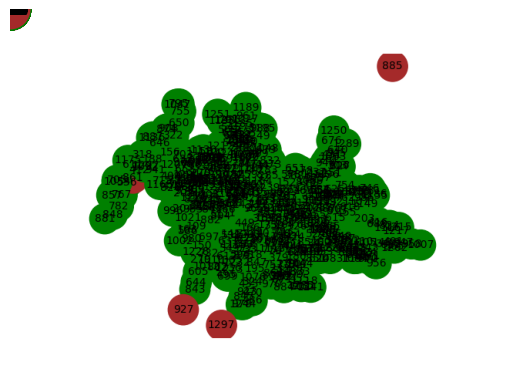

In [63]:
instance = SGAInstance("../problems/p6.json",
    populationInitializer= basicPI,
    populationSize = 100,
    generationsNumber = 100,
    parentsSelector = basicParentsSelector,
    crossover = basicCrossover,
    mutationProb = 0.7,
    mutator = basicMutator,
    fixer = basicFixer,
    evaluator = basicEvaluator)


firemans = [7,9,11]
print(instance._evaluator(fenotypeToGenotype(firemans, instance.problem.graph.number_of_nodes()), instance.problem))
disp = Displayer()
instance.problem.visualize_fire_without_burned(disp, firemans, output_path="gif6.gif")
#instance.problem.visualize_fire_without_burned(disp, firemans)


In [64]:
instance._mutator = noMutator

res1 = []
N=30

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res1.append(burned)

print("noMutator", statistics.fmean(res1))

instance._mutator = basicMutator

res2 = []

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res2.append(burned)

print("basicMutator", statistics.fmean(res2))

instance._mutator = neighbourMutator

res3 = []

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res3.append(burned)

print("neighbourMutator", statistics.fmean(res3))

instance._mutator = mixedMutator

res4 = []

for i in range(N):
    burned = instance._evaluator(fenotypeToGenotype(SGA(instance), instance.problem.graph.number_of_nodes()), instance.problem)
    res4.append(burned)

print("mixedMutator", statistics.fmean(res4))


1143
[15, 184, 661]
1008
[26, 145, 146]
1045
[30, 690, 861]
1041
[26, 362, 1091]
1155
[18, 240, 618]
1146
[15, 560, 711]
1126
[41, 656, 1221]
1038
[26, 292, 681]
1202
[24, 205, 560]
1118
[41, 436, 998]
1224
[47, 135, 997]
1219
[3, 328, 977]
1040
[30, 336, 864]
1044
[30, 293, 963]
1042
[26, 452, 586]
1186
[6, 153, 1113]
1125
[28, 83, 290]
1033
[30, 96, 738]
1045
[26, 269, 979]
1159
[18, 1113, 1273]
1179
[29, 179, 678]
1044
[30, 470, 963]
1160
[18, 309, 337]
1122
[41, 666, 953]
1192
[6, 982, 1190]
1060
[3, 28, 133]
1041
[30, 80, 598]
1029
[30, 195, 402]
1040
[26, 216, 416]
1124
[41, 515, 1096]
noMutator 1104.3333333333333
1125
[41, 659, 1169]
1158
[18, 693, 1009]
1043
[30, 337, 431]
1123
[41, 647, 835]
1234
[38, 72, 774]
1129
[15, 144, 197]
1234
[35, 701, 952]
1123
[41, 346, 1102]
1127
[41, 608, 1137]
1126
[12, 41, 573]
1026
[26, 331, 717]
1152
[45, 1140, 1260]
1150
[45, 149, 666]
1158
[18, 240, 1245]
1014
[2, 56, 680]
995
[26, 127, 552]
1050
[2, 119, 799]
1142
[15, 158, 961]
1044
[26, 5

In [65]:
print("noMutator", statistics.fmean(res1), " " ,min(res1))
print("basicMutator", statistics.fmean(res2)," " ,min(res2))
print("neighbourMutator", statistics.fmean(res3)," " ,min(res3))
print("mixedMutator", statistics.fmean(res4)," " ,min(res4))

noMutator 1104.3333333333333   1008
basicMutator 1105.2   995
neighbourMutator 1108.6   1035
mixedMutator 1104.9333333333334   1036
